In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
#Getting image data (28x28 image arrays Flattened to give 784)
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [3]:
from joblib import dump

scaler = StandardScaler()
X = scaler.fit_transform(X)

dump(scaler, 'num_std_scaler.bin', compress=True)

X.shape

(70000, 784)

In [4]:
y = list(map(float,y))
y = pd.get_dummies(y)
y.shape

(70000, 10)

(784,)

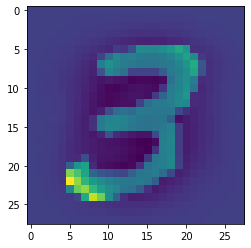

In [5]:
#Unflattening and showing an image
plt.imshow(X[7].reshape(28,28))
X[0].shape

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

classifier = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=100)

Epoch 1/50
560/560 [==============================] - 1s 1ms/step - loss: 0.4317 - accuracy: 0.8721
Epoch 2/50
560/560 [==============================] - 1s 1ms/step - loss: 0.1761 - accuracy: 0.9473
Epoch 3/50
560/560 [==============================] - 1s 1ms/step - loss: 0.1341 - accuracy: 0.9591
Epoch 4/50
560/560 [==============================] - 1s 1ms/step - loss: 0.1106 - accuracy: 0.9666: 0s - l
Epoch 5/50
560/560 [==============================] - 1s 1ms/step - loss: 0.0950 - accuracy: 0.9720
Epoch 6/50
560/560 [==============================] - 1s 1ms/step - loss: 0.0829 - accuracy: 0.9754
Epoch 7/50
560/560 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9773
Epoch 8/50
560/560 [==============================] - 1s 1ms/step - loss: 0.0663 - accuracy: 0.9798
Epoch 9/50
560/560 [==============================] - 1s 1ms/step - loss: 0.0598 - accuracy: 0.9815
Epoch 10/50
560/560 [==============================] - 1s 1ms/step - loss: 0.0532 - accuracy

In [8]:
predictions = [ list(map(int,pred == max(pred))) for pred in model.predict(X_test)]
predictions

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0,

In [9]:
accuracy_score(y_test, predictions)

0.9549285714285715

In [10]:
model.save("numeric_pred.h5")